# **Hit Classification at Elevation Part 3**
Author: Declan Costello

Date: 7/29/2023

## **Part 3 Description**

same as part 2, but with imputation, scaling, and more feature engineering

## **Table of Context**

1. [Installation](#Installation)
2. [Pulling Data](#Pulling-Data)
3. [Cleaning Data w/ cd](#Cleaning-Data)
5. [Exploring Cleaned Data w/ cd](#Exploring-Cleaned-Data)
4. [Machine Learning](#Machine-Learning)
5. [Results](#Results)
6. [Future Analysis](#Future-Analysis)

# **Installation**

The following installs the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

## **Inspecting Data**

## **Cleaning Data**

In [2]:
data = pd.read_csv('pybaseball_2022.csv')
data = data[data['hit_distance_sc'].notna()]

In [3]:
data = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

In [4]:
data = data[['hit_distance_sc','release_speed','launch_speed', 'launch_angle', 'hc_x', 'hc_y']]
#pitch types, p_throws, bats?..... look later!
#'events','woba_value', 'gamedate', 'hometeam',
##pull % #more helpful w batter hand.....
# DHHR

## **Imputing Data**

In [5]:
data.isnull().sum().sort_values(ascending=False)

launch_speed       112
hc_x                38
hc_y                38
release_speed        7
launch_angle         2
hit_distance_sc      0
dtype: int64

In [10]:
#https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ='mean')

imputer = imputer.fit(data['launch_speed'].isnull())

data['launch_speed'].nan = imputer.transform(data['launch_speed'].nan)

data.isnull().sum().sort_values(ascending=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#impute attempt 2
https://github.com/StephenFordham/scikit-learn_tutorials/blob/main/heart%20disease%20model.ipynb

In [ ]:
#Train test split after feature engineering or before?

# **Feature Engineering**

**Platoon Splits**

L vs R  || R vs L == 1 good for batter

 **Spray**

In [9]:
# spray --> hc_x + hc_y // only use for spray.......
data["spray_angle"] = np.arctan((data["hc_x"]-125.42)/(198.27-data["hc_y"]))*180/np.pi*.75

In [ ]:
#Do homeruns vs doubles

homeruns = data[data["events"]=="home_run"]

plt.scatter(homeruns["hc_x"],homeruns["hc_y"], marker='.')

#feature engineer into spray, then delete the 2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


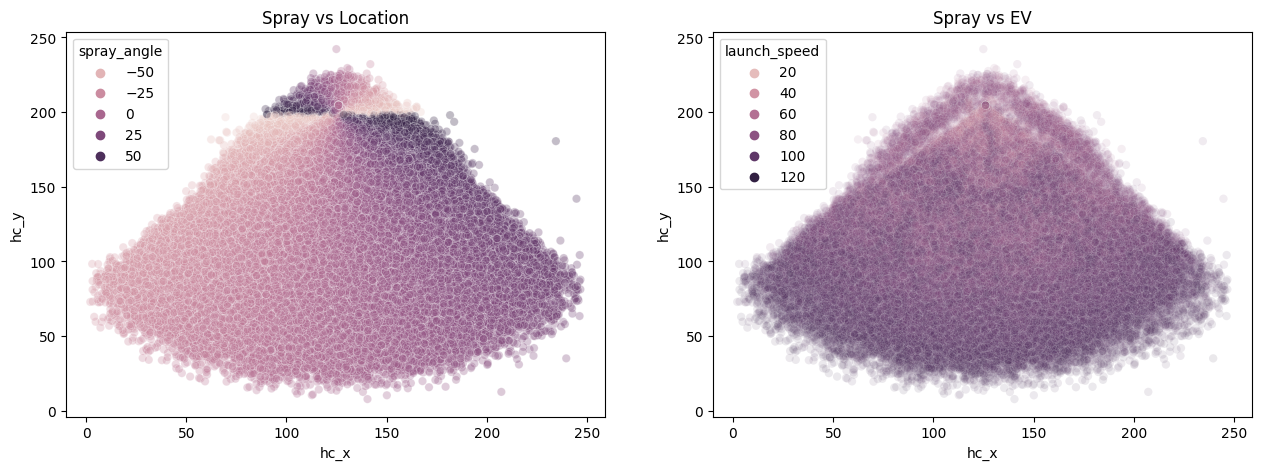

In [14]:
plt.figure(figsize=(32,5))

plt.subplot(141)
sns.scatterplot(data = data, x=data["hc_x"], y=data["hc_y"], hue = data["spray_angle"], alpha = 0.3,cmap="PiYG")
plt.title('Spray vs Location')

plt.subplot(142)
sns.scatterplot(data = data, x=data["hc_x"], y=data["hc_y"], hue = data["launch_speed"], alpha = 0.1,cmap="PiYG")
plt.title('Spray vs EV')

plt.show()

In [ ]:
#Do I chop off behind homeplate?

In [ ]:
delete x y coords now that i have spray coords col

** pull % #more helpful w batter hand..... **

 ** DHHR **

 **Barrel**

In [11]:
#https://github.com/StephenFordham/Visualisation_Portfolio/blob/main/Figure%202%20code.ipynb

# launch_speed - release_speed --> flush contact(higher the better more ev contained...)
data["Barrel"] = data["launch_speed"]-data["release_speed"]
#then drop release speed....?
#barrrel% equiv

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#barrels vs events?

**Cd**

In [ ]:
#TODO!

# CD --> home_team + game_date --> zip code --> temp, humidity, air pressure

'game_date','home_team',


**Pitch Type**

Because I do not trust pitch types, I am grouping them into Fastballs, Breaking, & Offspeed

Followed by a one hot encoding

In [15]:
# pitch_type --> Fastball, Change up, Breaking
#SOME KINF OF MAPPING
#ONE HOT ENCODE

'pitch_type'

# **Scaling**

unless scallin is technically apart of feature engineering?

# **Models**

score and graph score results of dif models

In [ ]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# also eval models w confusion matrixes, f1 scores

# **hyper param tune**

grid search, bayesina